# Laboratorio di simulazioni numeriche
### Esercizio 9.1

L'esercizio prevede di implementare un codice genetico per risolvere il problema del commesso viaggiatore nelle due seguenti casistiche:
- $N$ città posizionate casualmente su una circonferenza di raggio unitario;
- $N$ città posizionate casualmente in un quadrato di lato unitario;

L'algoritmo genetico provede che ad ogni iterazione venga creata una nuova generazione di $M$ percorsi applicando alla generazione precedente con una probabilità variabile nelle iterazioni una di queste mutazioni:
- scambio tra due città;
- shift di $n$ posizioni di un blocco di $m$ città;
- permutazione tra $m$ città contigue;
- inversione in un blocco di $m$ città;
- crossing-over.

La selezione per creare la generazione successiva viene svolta unicamente sulla metà popazione che presenta le funzioni di costo
$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$$
più basse. Si è osservato infatti come scartare la metà popolazione con gli $L^{(1)}$ più alti porti a configurazioni più vicine a quella ottimale. La selezione inoltre avviene preferenzialmente sugli individui migliori, ordinando gli individui in base alla funzione di costo e estraendo la posizione $j=int(M/2 \times r^p)$ con $r$ random e $p=5$ potenza ottimale trovata. 

I risultati ottenuti vengono riportati di seguito. Vengono mostrati il percorso ottimale trovato, un grafico di $\langle L^{(1)} \rangle$ calcolato sulla migliore metà della popolazione e un grafico del miglior $L^{(1)}$, entrambi in funzione del numero di generazioni.

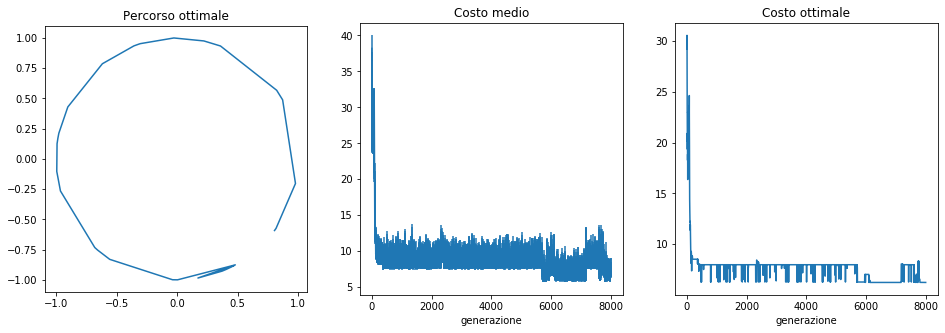

In [35]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

data_file=np.loadtxt('Lab9/data_circ.dat')
L_circ=np.loadtxt('Lab9/L_circ.dat')

x=data_file[:,0]
y=data_file[:,1]
num=data_file[:,2]

L_best=L_circ[:,0]
L_mean=L_circ[:,1]
L_err=L_circ[:,2]

n=np.arange(0,len(L_best))

plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
plt.plot(x,y)
plt.axis('scaled')
plt.title('Percorso ottimale')

plt.subplot(1,3,2)
plt.errorbar(n,L_mean,yerr=L_err)
plt.title('Costo medio')
plt.xlabel('generazione')

plt.subplot(1,3,3)
plt.errorbar(n,L_best)
plt.title('Costo ottimale')
plt.xlabel('generazione')

plt.show()

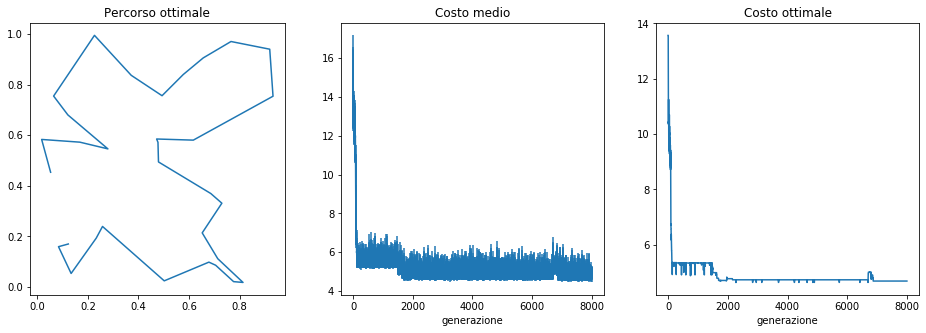

In [34]:
data_file=np.loadtxt('Lab9/data_square.dat')
L_circ=np.loadtxt('Lab9/L_square.dat')

x=data_file[:,0]
y=data_file[:,1]
num=data_file[:,2]

L_best=L_circ[:,0]
L_mean=L_circ[:,1]
L_err=L_circ[:,2]

n=np.arange(0,len(L_best))

plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
plt.plot(x,y)
plt.axis('scaled')
plt.title('Percorso ottimale')

plt.subplot(1,3,2)
plt.errorbar(n,L_mean,yerr=L_err)
plt.title('Costo medio')
plt.xlabel('generazione')

plt.subplot(1,3,3)
plt.errorbar(n,L_best)
plt.title('Costo ottimale')
plt.xlabel('generazione')

plt.show()

A commento dei risultati osserviamo che senza crossing-over l'algoritmo ha difficoltà a trovare configurazioni accettabili. Inoltre è risultato che le probabilità ottimali associate alla scelta delle mutazioni sono differenti nei due casi studiati: per entrambi è stata usata una probabilità del $14\%$ per le mutazioni di singolo individuo nelle prime $800$ generazioni, per poi diventare $2\%$ per la circonferenza e $1,5\%$ per il quadrato. 